# [Procesos Estocasticos EE-05](https://github.com/PCL-AI/EE-05)  
# Laboratorio 03: Proceso de Bernoulli


Es un proceso estocástico de tiempo discreto que toma solo dos valores, 0 y 1. El proceso puede ser una secuencia finita o infinita de variables aleatorias binarias. Las variables de los componentes de Bernoulli $X_i$ están distribuidas de manera idéntica e independientes. 

Por ejemplo, un proceso de Bernoulli es un lanzamiento repetido de monedas, posiblemente con una moneda con bias (pero constante). Cada variable Xi en la secuencia está asociada con un ensayo o experimento de Bernoulli. Todos ellos tienen la misma distribución de Bernoulli. Mucho de lo que se puede decir sobre el proceso de Bernoulli también se puede generalizar a más de dos resultados (como el proceso para un dado de seis caras); Esta generalización se conoce como el esquema de Bernoulli. Este proceso es descrito por Distribuciones bernoulli y  binomiales

## Distribuciones bernoulli y  binomiales

Una distribución de Bernoulli es la distribución de probabilidad de una variable aleatoria que toma el valor 1 con probabilidad $p$ y el valor 0 con probabilidad $1 - p$, 
\begin{cases} 
1-p & \text{for}\ k=0 \\ 
p & \text{for}\ k=1  \\ 
\end{cases}

Por ejemplo, aproximadamente el 10% de la población es zurda (p = 0,1). Queremos saber si 20 personas son tomadas al azar ¿cuál es la probabilidad de que 5 de estas 20 personas sean zurdas? Asignamos un 1 a cada persona si son zurdos y $0$ de lo contrario $P(X=1) = 0.1$  y  $P(X=0 ) = 0.9$

Una distribución binomial se deriva de la distribución de Bernoulli. ¿Cuál es la probabilidad de que las primeras 5 personas que escojamos sean zurdas, seguidas de 15 personas diestras? Esto es solo $0.13 × 0.97$



In [0]:
0.1 ** 5 * 0.9 ** 15

2.0589113209464914e-06

¿Y si quisiéramos que las últimas 5 personas fueran zurdas? Esto es solo $0.1^5 0.9^{15}$, que es la misma respuesta.
De hecho, no importa cómo organicemos a las 5 personas, siempre terminaremos con la misma probabilidad. Por lo tanto, debemos sumar todas las formas en que podemos organizar a las 5  personas seleccionadas.

Hay 20! formas de organizar 20 personas y hay 5! Formas de organizar las 5 personas que son elegidas y 7! maneras de organizar las 7 personas que no son elegidas.

Esto se da como:
$\dfrac{20!}{5!\ 15!}$

In [0]:
from math import factorial

factorial(20) / (factorial(5) * factorial(15))

15504.0

Ahora podemos calcular la probabilidad de que haya 5  personas zurdas en una selección aleatoria de 20 personas como:

$P(X=5) = \begin{equation*} 
\binom{20}{5} 
\end{equation*} (0.1)^5 (0.9)^{15}$

In [0]:
(factorial(20) / (factorial(5) * factorial(15))) * 0.1 ** 5 * 0.9 ** 15

0.0319213611199544

Esto generalizará tal que:
$P(X=k) = \begin{equation*} 
\binom{n}{k} 
\end{equation*} (p)^k (1-p)^{n-k}$

 Scipy tiene un paquete binomial que se puede usar para calcular estas probabilidades:

In [0]:
# parametros son k, n y p
from scipy.stats import binom

binom.pmf(5, 20, 0.1)

0.03192136111995428

Podemos usar esta función para calcular cuál es la probabilidad de que 5 o menos personas sean zurdas de una selección de 20 personas.

$P(X \leq 5) = \sum_{i=0}^{5} \begin{equation*} 
\binom{20}{i} 
\end{equation*} (0.1)^i (0.9)^{n-i}$

In [0]:
sum([binom.pmf(x, 20, 0.1) for x in range(6)])

0.9887468658354902

Podemos ver que hay una probabilidad casi insignificante de obtener más de 6 personas zurdas en un grupo aleatorio de 20 personas.

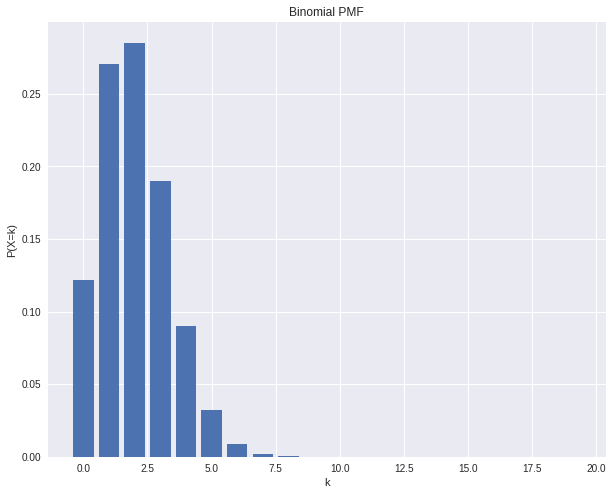

In [0]:
import matplotlib.pyplot as plt

plt.bar(range(20), [binom.pmf(x, 20, 0.1) for x in range(20)])
plt.xlabel('k')
plt.ylabel('P(X=k)')
plt.title('Binomial PMF')
plt.show()

# Ruleta americana

En una rueda de ruleta americana hay 38 casillas: 18 negro, 18 rojo, y  2 verdes

Apostamos al color negro 10 veces seguidas, ¿cuáles son las posibilidades de ganar más de la mitad esas apuestas?

$P(X \gt 5) = \sum_{i=6}^{10} \begin{equation*} 
\binom{10}{i} 
\end{equation*} \bigg(\dfrac{18}{38}\bigg)^i \bigg(1-\dfrac{18}{38}\bigg)^{n-i}$

In [0]:
p = 18/38

sum([binom.pmf(x, 10, p) for x in range(6, 11)])

0.31412504396776203

# Procesos de Bernoulli





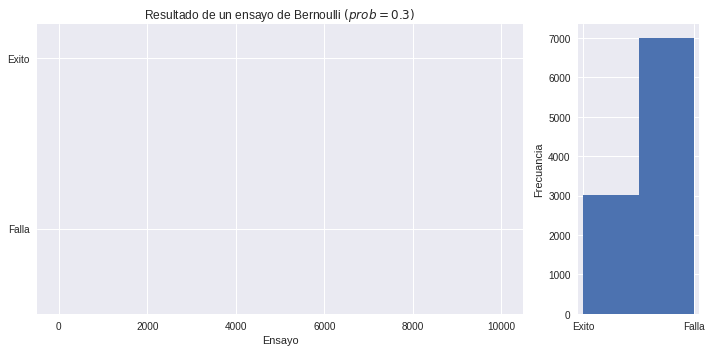

In [0]:
%matplotlib inline
from __future__ import division

import numpy as np
import pandas as pd
import statsmodels.api as sm
import sympy as sp

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats
from scipy.special import gamma



# Simular data
np.random.seed(123)
#theta
nobs = 10000
prob = 0.3
Y = np.random.binomial(1, prob, nobs)

# Plot la data
fig = plt.figure(figsize=(10,5))
gs = gridspec.GridSpec(1, 2, width_ratios=[8, 2]) 
ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1])

ax1.plot(range(nobs), Y, 'x')
ax2.hist(-Y, bins=2)

ax1.yaxis.set(ticks=(0,1), ticklabels=('Falla', 'Exito'))
ax2.xaxis.set(ticks=(-1,0), ticklabels=('Exito', 'Falla'));

ax1.set(title=r'Resultado de un ensayo de Bernoulli $(prob=0.3)$', xlabel='Ensayo', ylim=(-0.5, 1.2))
ax2.set(ylabel='Frecuancia')

fig.tight_layout()


# Rutinas aleatorias

In [0]:
import random
 
def TirarDado():
    """returns a random int between 1 and 6"""
    return random.choice([1,2,3,4,5,6])
 
def TirarDados(n = 10):
    result = ''
    for i in range(n):
        result = result + str(TirarDado())
    print(result)

#TirarDados(5)

random.seed(0)

def runSimDado(Sequencia, Intentos, txt):
    total = 0
    for i in range(Intentos):
        result = ''
        for j in range(len(Sequencia)):
            result += str(TirarDado())
        if result == Sequencia:
            total += 1
    print('Probabilidad teorica de ', txt, '=',
          round(1/(6**len(Sequencia)), 8)) 
    EstProbabilidad = round(total/Intentos, 8)
    print('Probabilidad Estimada de', txt, '=',
          round(EstProbabilidad, 8))
    
#runSimDado('11111', 1000, '11111')




In [2]:
# lanzando un solo dado
TirarDado()

4

In [3]:
#lanzando n dados
n = 6
TirarDados(n)

413544


In [4]:
# Probabilidad de obetener sequencia de XXX en NNNN Intentos
runSimDado('543', 100000, '543')

Probabilidad teorica de  543 = 0.00462963
Probabilidad Estimada de 543 = 0.00492


##  Problema del mismo dia de cumpleanos

In [5]:
# Problema del mismo dia de cumpleanos
import math

def MismoDia(numPersonas, numIgual):
    posibleDias = range(366)
    cumpleanos = [0]*366
    for p in range(numPersonas):
        Dia = random.choice(posibleDias)
        cumpleanos[Dia] += 1
    return max(cumpleanos) >= numIgual

    
def CumpleanosProb(numPersonas, numIgual, numIntentos):
    numHits = 0
    for t in range(numIntentos):
        if MismoDia(numPersonas, numIgual):
            numHits += 1
    return numHits/numIntentos



for numPersonas in [10, 20, 40, 100, 366]:  ## numero de personas compartiendo el cumpleanos
    print('\n')
    print('Para', numPersonas,'personas la prob. est. del mismo cumpleanos es', CumpleanosProb(numPersonas, 2, 10000))
    numerador = math.factorial(366)
    denom = (366**numPersonas)*math.factorial(366-numPersonas)
    print('prob. teorica es', 1- numerador/denom)
   



Para 10 personas la prob. est. del mismo cumpleanos es 0.1201
prob. teorica es 0.1166454118039999


Para 20 personas la prob. est. del mismo cumpleanos es 0.4079
prob. teorica es 0.4105696370550831


Para 40 personas la prob. est. del mismo cumpleanos es 0.8899
prob. teorica es 0.89054476188945


Para 100 personas la prob. est. del mismo cumpleanos es 1.0
prob. teorica es 0.9999996784357714


Para 366 personas la prob. est. del mismo cumpleanos es 1.0
prob. teorica es 1.0


In [6]:
random.seed(2)
['%.2f' % random.random() for i in range(7)]

['0.96', '0.95', '0.06', '0.08', '0.84', '0.74', '0.67']

## Movimiento browniano

In [0]:
import numpy as np
import matplotlib.pyplot as plt



def Brownian(seed, N):
    
    np.random.seed(seed)                         
    dt = 1./N                                    # step de tiempo
    b = np.random.normal(0., 1., int(N))*np.sqrt(dt)  # incrementos brownianos 
    W = np.cumsum(b)                             # camino brownian
    return W, b

seed = 5       
N  = 2.**6     # incrementos

# incrementos brownianos
b = Brownian(seed, N)[1]

# movimiento browniano
W = Brownian(seed, N)[0]
W = np.insert(W, 0, 0.)                    # W_0 = 0. para movimiento browniano

Text(0.5,1,'Incrementos brownianos')

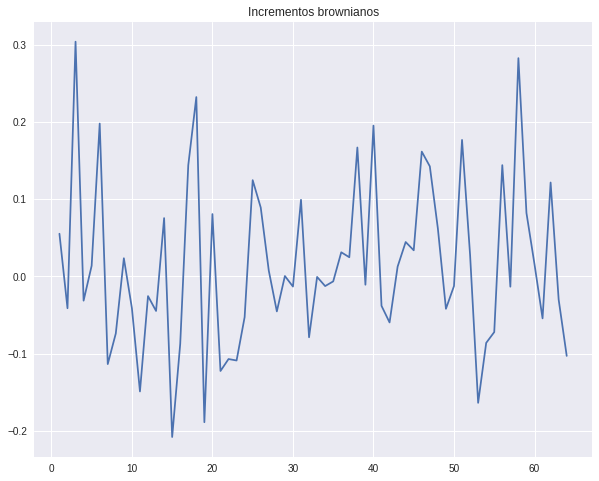

In [8]:
# incrementos brownianos
%matplotlib inline
plt.rcParams['figure.figsize'] = (10,8)
xb = np.linspace(1, len(b), len(b))
plt.plot(xb, b)
plt.title('Incrementos brownianos')

Text(0.5,1,'movimiento browniano')

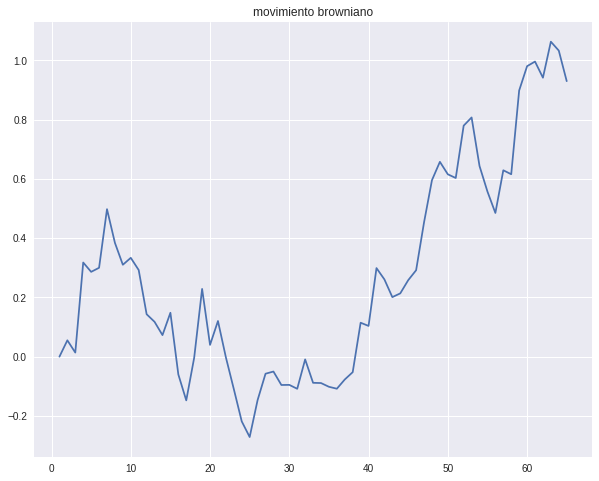

In [9]:
# movimiento browniano
xw = np.linspace(1, len(W), len(W))
plt.plot(xw, W)
plt.title('movimiento browniano')